# Project part 2 - Unsupervised Learning

In this part, you are required to implement the k-means algorithm and apply your implementation on the given dataset, which contains a set of 2-D points. You are required to implement two different strategies for choosing the initial cluster centers.

Strategy 1: randomly pick the initial centers from the given samples.

Strategy 2: pick the first center randomly; for the i-th center (i>1), choose a sample (among all possible samples) such that the average distance of this chosen one to all previous (i-1) centers is maximal.

You need to test your implementation on the given data, with the number k of clusters ranging from 2-10. Plot the objective function value vs. the number of clusters k. Under each strategy, plot the objective function twice, each start from a different initialization.

Import the required libraries

In [9]:
import time
import random 
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import scipy.io

Load the data from 'AllSamples.mat' file 

In [10]:
data = scipy.io.loadmat('AllSamples.mat') 

In [11]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'AllSamples'])

Load the from records from 'data' into a dataframe for further processing

In [12]:
array1 = data['AllSamples']

In [13]:
df1 = pd.DataFrame(array1)
df1.head()

,0,1
0,2.059249,7.205988
1,8.875781,8.960924
2,8.007064,2.775320
3,5.017288,3.763120
4,6.390562,5.179565


In [14]:
df1.shape

(300, 2)

The below function finds the euclidian distance between each centroid in sampledf and the data points in maindf. Then it computes the centroid that has minimum distance for each data point and then adds the index of that centroid to the maindf dataframe. An another function is called to recalibrate the centroids position after the above update. 

In [15]:
def euclidiandistance(samplerows, mainrows, sampledf, maindf,intdf):
    '''
    samplerows - number of rows in sampledf
    mainrows   - number of rows in maindf
    sampledf   - dataframe containing centroids
    maindf     - dataframe containing data points
    intdf      - dataframe for storing updated centroid coordinates
    '''
    z_list = []
    for i in range(mainrows):
        int_list = []
        for j in range(samplerows):
            int_list.append(np.sqrt(np.square(maindf.iloc[i][0] - sampledf.iloc[j][0]) + np.square(maindf.iloc[i][1] - sampledf.iloc[j][1])))
        z_list.append(int_list.index(min(int_list))) # append the index of centroid from sampledf that has minimum distance from data point
    maindf['z'] = z_list     # add a new column in maindf fom z_list list
    centroidcalculation(maindf,intdf) # call function to recalibrate the centroids coordinates
    return

Centroidcalculation function takes all data points belonging to one cluster centroid and recalibrates its centroid by calculating mean of all x coordinates and mean of all y coordinates.

In [16]:
def centroidcalculation(mdf,idf):
    '''
    mdf - dataframe containing data points and the centroid they belong to
    idf - dataframe for storing updated centroid coordinates
    '''
    zidom = sorted(mdf['z'].unique())
    for i in zidom:
        df6 = mdf[mdf['z']==i]  # filter the data points that belong to each cluster centroid
        idf.iloc[i][0] = df6[0].mean(axis=0)  # calculate the mean of all x coordinates
        idf.iloc[i][1] = df6[1].mean(axis=0)  # calculate the mean of all y coordinates
    return

Below is the object function which calculates the total cost for each cluster which is give by the below equation
                            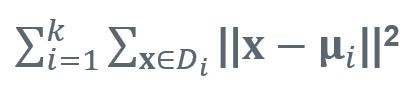

In [17]:
def totalloss(lists, maindf, samepldf):
    '''
    lists     - contains the list of unique values in columnm 'z' in maindf which denote the index of centroid in sampledf
    maindf    - dataframe containing data points and the centroid they belong to
    sampledf  - dataframe containing centroids
    '''
    cost_func = 0
    for i in lists:
        df = maindf[maindf['z']==i]
        fin_rows = df.shape[0]
        for j in range(fin_rows):
            cost_func+=(np.square(df.iloc[j][0] - samepldf.iloc[i][0]) + np.square(df.iloc[j][1] - samepldf.iloc[i][1]))
    return cost_func

### Strategy 1: randomly pick the initial centers from the given samples

In [18]:
start_time = time.time()
cost_dict = {}
for l in range(1,3):
    error = {}
    for k in range(2,11):
        count=0
        df1 = pd.DataFrame(array1) # load data into df1
        df2 = pd.DataFrame()   # dataframe to hold initialised centroids
        df3 = pd.DataFrame()
        df4 = pd.DataFrame()   # df4 to contain recalibrated centroids every time while loop runs
        df5 = pd.DataFrame()
        df2 = df1.sample(k)    # sample k centroid from df1 which contains 300 data points
        tot_rows = df1.shape[0]
        int_rows = df2.shape[0]
        while(df4.equals(df2) == False): # update df2 with df4 after each loop since df2 was used in euclidianfunction
            count+=1
            if count>1 :
                df2 = df4.copy()   
            else:
                df4 = df2.copy()   
            euclidiandistance(int_rows, tot_rows, df2, df1,df4)  # call euclidiandistance function
        zfdom = sorted(df1['z'].unique())   
        cost = totalloss(zfdom, df1, df2) # calcuate total cost
        error[k]=cost
    cost_dict[l] = error   # cost_dict is the objective function. key is the number of times this algorithm been called and the values are the cost for k centroids
print("Training time:" + str((time.time() - start_time)/60) + " minutes")

Training time:2.5880502820014955 minutes


### Plotting the objective function values vs K for strategy 1

Objective function for k = [(2, 1921.0334858562055), (3, 1293.7774523911364), (4, 797.9601840789946), (5, 598.5546443663114), (6, 469.13171566558185), (7, 449.0089905693911), (8, 317.12540313018957), (9, 313.5115112828049), (10, 220.15948928846694)]


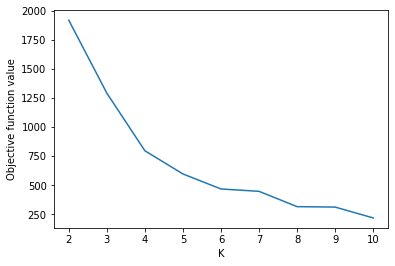

Objective function for k = [(2, 1921.0334858562053), (3, 1294.298417485317), (4, 792.7234630260813), (5, 653.9567908403945), (6, 476.29657052696666), (7, 396.4565140145377), (8, 323.24222225065967), (9, 256.2228642880839), (10, 268.45158428283366)]


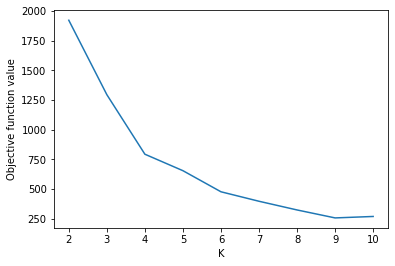

In [19]:
def objectivefunctionplot(costvalue):
    for k in costvalue:
        lists = sorted(k.items()) # sorted by key, return a list of tuples
        print("Objective function for k = {}".format(lists))
        x, y = zip(*lists) # unpack a list of pairs into two tuples
        plt.plot(x, y)
        plt.xlabel('K')
        plt.ylabel('Objective function value')
        plt.xticks(np.arange(min(x), max(x)+1, 1.0))
        plt.show()
    return
cost = cost_dict.values()
objectivefunctionplot(cost)

The below function implments strategy 2 where intial cluster centroid is choosen randomly but the subsequent centroids are choosen basing on maximum average distance from previous all centroids.

In [20]:
def kstrategy2(l,maindf):
    '''
    l      - number of centriods to be initialised  
    maindf - dataframe containing data points
    '''
    df2 = maindf.sample(1)    # choose first centroid randomly from all the data points
    tot_rows = maindf.shape[0] 
    int_rows = df2.shape[0]
    while(l!= int_rows):  # while l not equal to number of rows in df2 which contains the centroids
        int_list = []
        tot_list = []
        for i in range(tot_rows):
            if ((df2[0]==maindf.iloc[i][0]) & (df2[1]==maindf.iloc[i][1])).any():
                continue
            else:
                for j in range(int_rows):
                    int_list.append(np.sqrt(np.square(maindf.iloc[i][0] - df2.iloc[j][0]) + np.square(maindf.iloc[i][1] - df2.iloc[j][1])))   # calculte the distance of each point from all centroids 
                value = sum(int_list)/len(int_list)  # sum up all the distances for each point
                tot_list.append(value)  
        df2.loc[int_rows] = maindf.iloc[tot_list.index(max(tot_list))]   # select the point with maximum average distance
        int_rows = df2.shape[0]
    return df2

In [21]:
start_time = time.time()
cost_dict2 = {}
for i in range(1,3):
    error2 = {}
    for k in range(2,11):
        count=0
        df1 = pd.DataFrame(array1) # load data into df1
        df3 = kstrategy2(k,df1) # call function to initialise centroids
        df4 = pd.DataFrame()
        df5 = pd.DataFrame()
        tot_rows = df1.shape[0]
        int_rows = df3.shape[0]
        while(df4.equals(df3) == False):  # update df2 with df4 after each loop since df2 was used in euclidianfunction
            count+=1
            if count>1 :
                df3 = df4.copy()
            else:
                df4 = df3.copy()
            euclidiandistance(int_rows, tot_rows, df3, df1,df4)  # call euclidiandistance function
        zfdom = sorted(df1['z'].unique())
        cost = totalloss(zfdom, df1, df3)  # calcuate total cost
        error2[k]=cost
    cost_dict2[i] = error2  # cost_dict2 is the objective function. key is the number of times this algorithm been called and the values are the cost for k centroids
print("Training time:" + str((time.time() - start_time)/60) + " minutes")

Training time:5.024332388242086 minutes


### Plotting the objective function values vs K for strategy 2

Objective function for k = [(2, 1921.0334858562055), (3, 1294.2984174853173), (4, 792.5378104413304), (5, 613.9866286066629), (6, 462.92635582483763), (7, 399.373619874249), (8, 389.347466170943), (9, 292.12508578795854), (10, 291.6011826214556)]


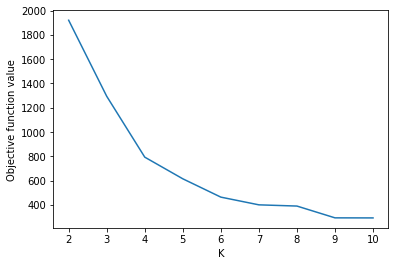

Objective function for k = [(2, 1921.0334858562053), (3, 1293.7774523911348), (4, 1115.5344812362405), (5, 592.528384259247), (6, 462.92635582483746), (7, 402.9183586205079), (8, 305.38707328478347), (9, 295.5040924088939), (10, 288.05281731580794)]


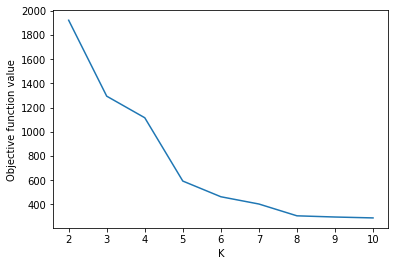

In [22]:
cost = cost_dict2.values()
objectivefunctionplot(cost)